In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import pandas as pd

import sys
sys.path.append('../')
import utils
import plotting


In [2]:
ds_MODEL = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gridmod_final-validation/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')
ds_NEI = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gtropchem/merra2_05x0625_tropchem_na/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')
ds_egrid = xr.open_mfdataset('../../GCrundirs/type_NA-out_conc-yr_2016-gridmod_final-validation-egrid/OutputDir/HEMCO_diagnostics.2016*.nc', combine = 'by_coords')

ds_egrid = ds_egrid.isel(lev = 0)
ds_NEI = ds_NEI.isel(lev = 0)
ds_MODEL = ds_MODEL.isel(lev = 0)

ds = xr.concat([ds_egrid, ds_NEI, ds_MODEL], pd.Index(['egrid', 'NEI', 'MODEL'], name='model_name'))

/home/emfreese/anaconda3/envs/grid_model/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/emfreese/anaconda3/envs/grid_model/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/emfreese/anaconda3/envs/grid_model/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/emfreese/anaconda3/envs/grid_model/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/emfreese/anaconda3/envs/grid_model/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


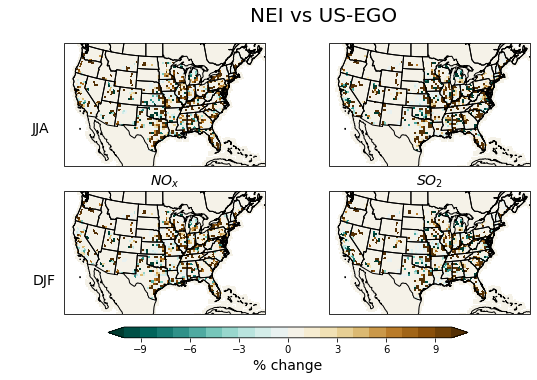

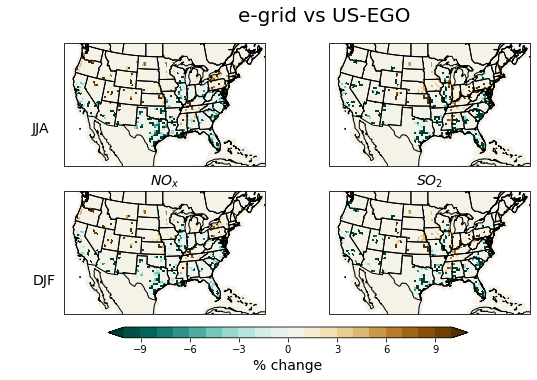

In [11]:
plotting.plot_percent_emissions_dif(ds.sel(model_name = 'NEI'), ds.sel(model_name = 'MODEL'), 
                                    ['EmisNO_Anthro', 'EmisSO2_Anthro'],['JJA','DJF'], 
                                    levels = np.arange(-10,11,1), lat_lon = plotting.lat_lon, figsize = [10,5])
plt.suptitle('NEI vs US-EGO', fontsize = 20)
#plt.savefig('./Figures/NEI_model_emis_dif.png', bbox_inches = 'tight', dpi = 150)
plotting.plot_percent_emissions_dif(ds.sel(model_name = 'egrid'), ds.sel(model_name = 'MODEL'), 
                                    ['EmisNO_Anthro', 'EmisSO2_Anthro'],['JJA','DJF'], 
                                    levels = np.arange(-10,11,1), lat_lon = plotting.lat_lon, figsize = [10,5])
plt.suptitle('e-grid vs US-EGO', fontsize = 20);
#plt.savefig('./Figures/egrid_model_emis_dif.png', bbox_inches = 'tight', dpi = 150)
